In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Loading our sample dataset.
df = pd.read_csv('googleplaystore.csv')
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
6                Smoke Effect Photo Maker - Smoke Editor       ART_AND_DESIGN   
7                                       Infinite Painter       ART_AND_DESIGN   
8                                   Garden Coloring Book       ART_AND_DESIGN   
9                          Kids Paint Free - Drawing Fun       ART_AND_DESIGN   
10                               Text on Photo - Fonteee       ART_AND_DESIGN   
11               Name Art Ph

In [5]:
df1 = df.sort_values(by=['Installs','Rating'], ascending=False)
print(df1)
df1.shape

                                                     App            Category  \
10472            Life Made WI-Fi Touchscreen Photo Frame                 1.9   
4005             Clean Master- Space Cleaner & Antivirus               TOOLS   
7536   Security Master - Antivirus, VPN, AppLock, Boo...               TOOLS   
371                Google Duo - High Quality Video Calls       COMMUNICATION   
3255                          SHAREit - Transfer & Share               TOOLS   
4039               Google Duo - High Quality Video Calls       COMMUNICATION   
4566                          SHAREit - Transfer & Share               TOOLS   
378          UC Browser - Fast Download Private & Secure       COMMUNICATION   
420          UC Browser - Fast Download Private & Secure       COMMUNICATION   
1722                                      My Talking Tom                GAME   
1908                                      My Talking Tom                GAME   
3450                                    

(10841, 13)

In [13]:
df2 = df1.dropna().copy()
print("We have dropped ",df1.shape[0]- df2.shape[0]," entries with NaN values.")

We have dropped  1481  entries with NaN values.


Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

### Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.
- Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

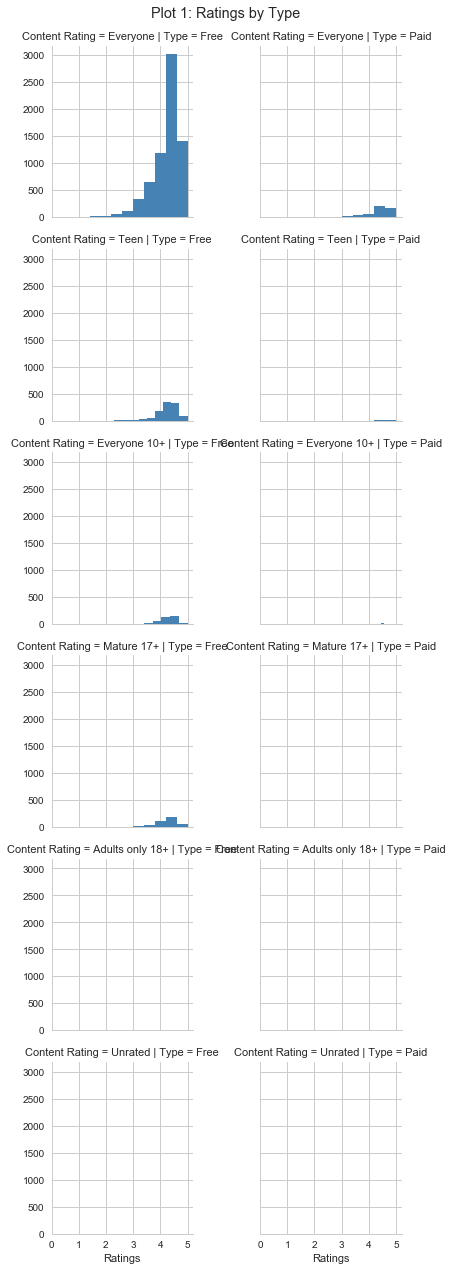

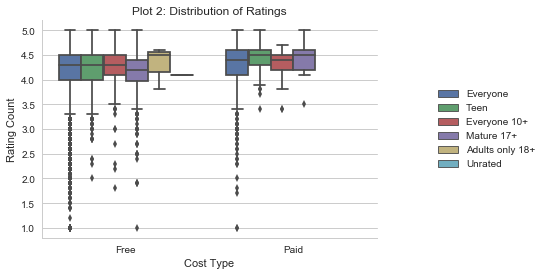

In [93]:
# Creating variables for each of the two conditions to graph using the basic
# matplotlib functionality.

# Showing the  information in a seaborn facet grid.
sns.set(style="whitegrid")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(df2, row="Content Rating", col="Type", legend_out=True)
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "Rating", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.95)
# Making a more informative axis name.
g.set_axis_labels('Ratings')
g.set(xticks=[0,1,2,3,4,5])
plt.suptitle('Plot 1: Ratings by Type')
# Removing excess lines around the plot.
sns.despine(trim=False)
plt.show()

# Comparing groups using boxplots.
ax = sns.boxplot(x='Type',y='Rating',hue='Content Rating',data=df2)  
plt.title('Plot 2: Distribution of Ratings by Type and Content Rating')
sns.despine(offset=0, trim=False)
ax.set(xlabel='Cost Type', ylabel='Rating Count')
# Put a legend to the right side
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

plt.show()

Our first grid of charts is not a great way of looking at the data. Firstly, we need to look at so many graphs and secondly, we don't learn alot from them except that most apps are rated everyone and most of them are rated between 4 and 5. Pros of the second plot are that we can see that most of the ratings are between 4 and 4.5 and that many more outliers exist for some content ratings (like Everyone) vs other groups (like Adults Only). We do lose the resolution of knowing how many instances of a certain content rating exist though.

We can also see that there are not paid apps that are unrated or Adults Only. 

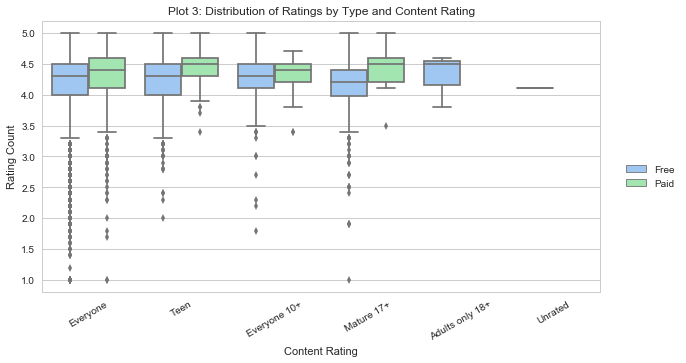

In [94]:
#Comparing groups again, but with a different emphasis.
# Setting the overall aesthetic.
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

ax = sns.boxplot(x='Content Rating',y='Rating',hue='Type',data=df2,palette='pastel')  
plt.title('Plot 3: Distribution of Ratings by Type and Content Rating')
plt.xticks(rotation=30)
#sns.despine(offset=10, trim=True)
ax.set(xlabel='Content Rating', ylabel='Rating Count')
# Put a legend to the right side
ax.legend(loc='best', bbox_to_anchor=(1.15, .5), ncol=1)

plt.show()

This is the same graph as above but with different emphasis. We categorize with the content rating and then can compare if there are differences within a category between free and paid apps. Paid apps have a trend of being slightly higher in rating compared to free apps. Could this be a reflection of quality that comes with some paid apps as opposed to their free counterparts?

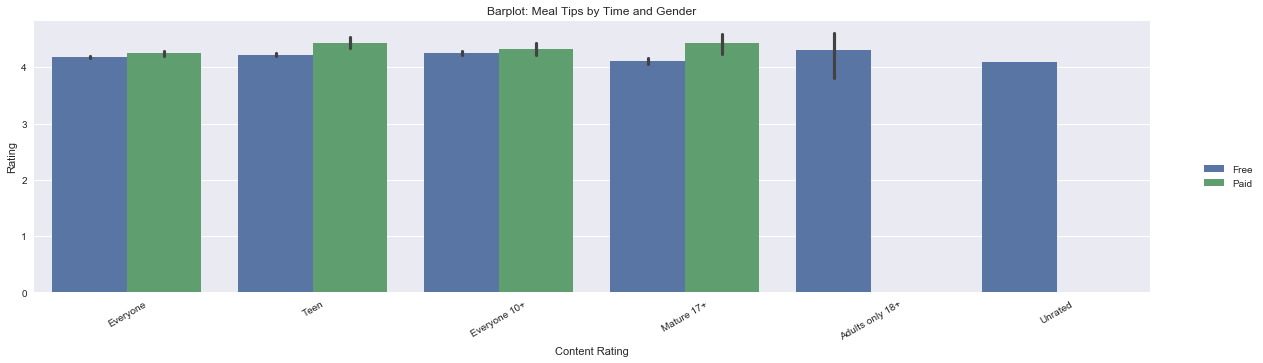

In [92]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
g = sns.barplot(x='Content Rating',y='Rating',hue='Type',data=df2)
plt.xticks(rotation=30)
plt.title('Barplot: Meal Tips by Time and Gender')
plt.legend(loc='best', bbox_to_anchor=(1.1, 0.5), ncol=1)

plt.show()

Bar plots lose a lot of resolution that we see with boxplots. Here we just see average and confidence interval and lose resolution of the potential outliers and range of data points.

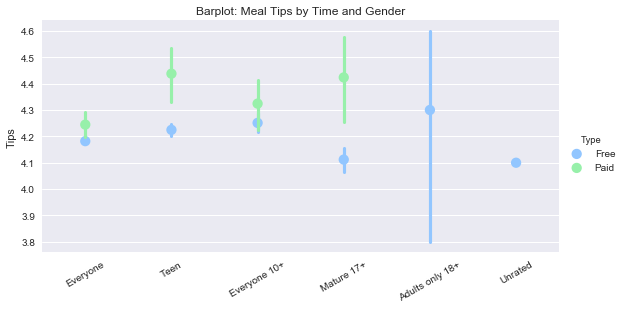

In [95]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")
g = sns.factorplot(x='Content Rating',y='Rating',hue='Type',data=df2,
                   height=6,aspect=2, strip="bar", palette="pastel", ci=95, join=False)

g.despine(left=True)
g.set_ylabels("Tips")
g.set_xlabels("")
plt.title('Barplot: Meal Tips by Time and Gender')
plt.xticks(rotation=30)

plt.show()

This plot is very similar to the box plot but it is more asthetically pleasing and takes less space to show the same information.

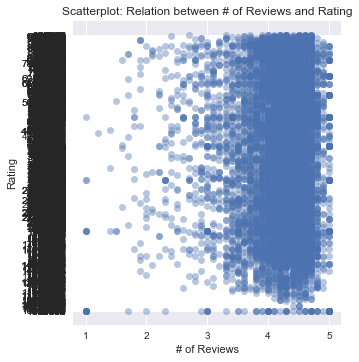

TypeError: can't multiply sequence by non-int of type 'float'

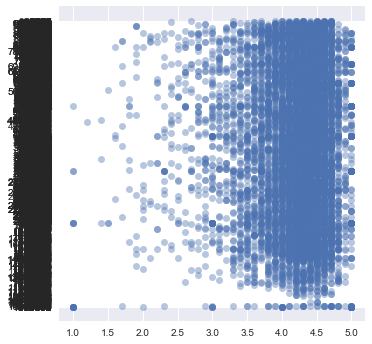

In [97]:
g = sns.lmplot(y='Reviews', # Variable 1.
               x='Rating', # Variable 2.
               data=df2, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Rating")
g.set_xlabels("# of Reviews")
plt.title('Scatterplot: Relation between # of Reviews and Rating')
plt.show()

g = sns.lmplot(y='Reviews', # Variable 1.
               x='Rating', # Variable 2.
               data=df2, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Rating")
g.set_xlabels("# of Reviews")
plt.title('Scatterplot: Relation between # of Reviews and Rating')
plt.show()

In [ ]:
# Setting the overall aesthetic.
sns.set(style="white")

g = sns.lmplot(y='Rating', # Variable 1.
               x='Reviews', # Variable 2.
               hue='Category',
               data=tips, # Data.
               col='time',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Regression: Meal Tips by Total Bill, split by gender and time')
plt.subplots_adjust(top=0.9)
plt.show()

g = sns.lmplot(y='Rating', # Variable 1.
               x='Reviews', # Variable 2.
               data=df2, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Rating")
g.set_xlabels("# of Reviews")
plt.title('Scatterplot: Relation between # of Reviews and Rating')
plt.show()

g = sns.lmplot(y='tip', 
               x='total_bill',
               hue='time',
               data=tips, # Data.
               col='sex',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("Tips")
g.set_xlabels("Total Bill")
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()